In [1]:
import pyvisa

In [2]:
rm = pyvisa.ResourceManager()

In [3]:
rm.list_resources()

('ASRL1::INSTR', 'ASRL10::INSTR')

In [4]:
pippo = rm.open_resource("tcpip0::192.168.40.10::inst0::INSTR")

In [5]:
print(pippo.query('*IDN?'))

Keysight Technologies,N9916A,MY53104702,A.08.01



In [6]:
print(pippo.query('SYST:BATT:ABSC?'))

70



# vna: vector network analyzer
# psa: power spectrum analyzer
TONO:SINUSOIDE
arrivano in ingresso frequenze



---

settiamo una freq min e una max
misuriamo s21: forward trasmition - segnale trasmesso
quello che vediamo è in dB

In [24]:
pluto = pippo.query('INST:SEL?')
pluto

'"SA"\n'

In [26]:
pippo.query('INST:SEL "NA";*OPC?')

'1\n'

In [60]:
pippo.query('CALC:PAR1:DEF S21;*OPC?')
# NON VA
# pippo.query('CALC:PAR1:SEL;*OPC?')
# pippo.query('DISP:WIND:TRAC1:Y:AUTO;*OPC?')

'1\n'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [77]:
pippo.query('CALC:FORM?')
pluto = pippo.query('TRACE:DATA? SDATA')
# lista di parte reale e parte immaginaria alternati
pluto = list(map(float, pluto.strip('\n').split(','))) 
len(pluto)

402

-2.5344985434475165

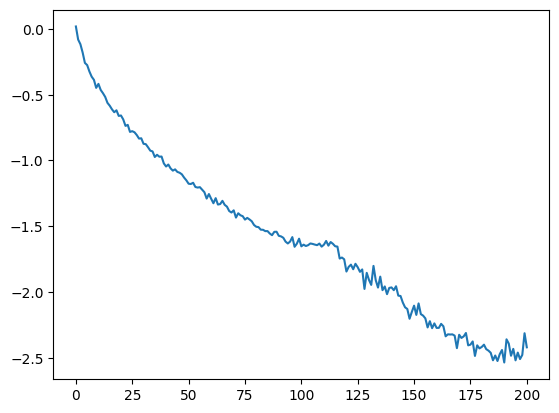

In [96]:
b = pluto[::2] # parte immaginaria (FORSE)
a = pluto[1::2] # parte reale (FORSE)

c = np.sqrt(np.array(a)**2+np.array(b)**2)

# conversione in db 


c_dB = 20*np.log10(c)
plt.plot(c_dB)
min(c_dB)


In [67]:

#mlog =

'MLOG\n'